In [2]:
import pandas
from typing import List, Type
from LeanPy.Structures.Expression.Level import *
from LeanPy.Structures.Expression.Expression import *
from matplotlib import pyplot as plt


df = pandas.read_csv('statistics.csv')
print(df.describe())
print(df.columns)

       type_LevelZero  type_LevelSucc  type_LevelMax  type_LevelIMax  \
count   434762.000000   434762.000000  434762.000000   434762.000000   
mean         3.998289        6.263066       4.071987        0.005086   
std         16.054529       19.427399      42.440710        0.435930   
min          0.000000        0.000000       0.000000        0.000000   
25%          0.000000        1.000000       0.000000        0.000000   
50%          0.000000        3.000000       0.000000        0.000000   
75%          2.000000        6.000000       0.000000        0.000000   
max       1509.000000     2052.000000    9231.000000      200.000000   

       type_LevelParam       type_App    type_Lambda        type_Pi  \
count    434762.000000  434762.000000  434762.000000  434762.000000   
mean         39.671563      86.674334       1.537029       7.116804   
std         111.291903     272.765945      12.293928       6.621742   
min           0.000000       0.000000       0.000000       0.000000

In [3]:
all_constructor_types: List[Type[Expression] | Type[Level]] = [
        LevelZero, LevelSucc, LevelMax, LevelIMax, LevelParam, 
        App, Lambda, Pi, Let, Const, BVar, Sort, Proj, NatLit, StrLit
    ]

# in each row, we have the number of times each constructor was used in the declaration
# for each constructor we plot the range of the frequency of its use across all rows
type_constructors_columns = [f'type_{c.__name__}' for c in all_constructor_types]


type_LevelZero     0.020358
type_LevelSucc     0.031889
type_LevelMax      0.020733
type_LevelIMax     0.000026
type_LevelParam    0.201993
type_App           0.441313
type_Lambda        0.007826
type_Pi            0.036236
type_Let           0.000025
type_Const         0.136728
type_BVar          0.091992
type_Sort          0.008629
type_Proj          0.000107
type_NatLit        0.001821
type_StrLit        0.000323
dtype: float64


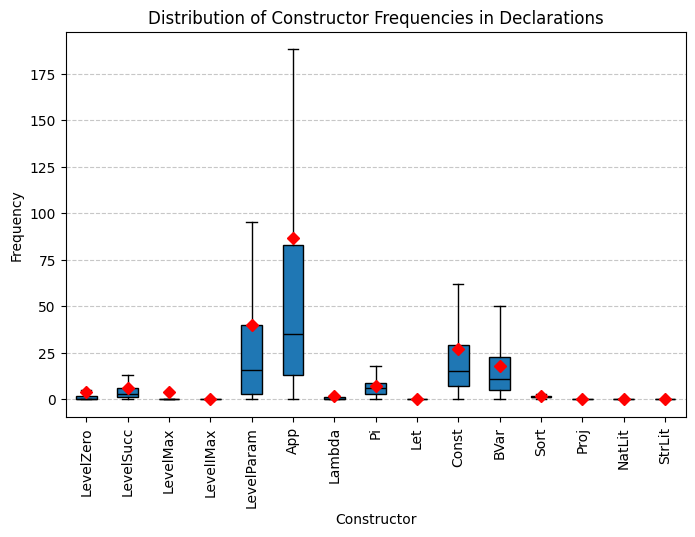

In [25]:
import numpy as np

plt.figure(figsize=(8, 5))

# Create a boxplot with individual scales
data = df[type_constructors_columns].values
plt.boxplot(data, patch_artist=True, medianprops={'color': 'black'}, showfliers=False, showmeans=True, meanprops={'marker': 'D', 'markeredgecolor': 'red', 'markerfacecolor': 'red'})

# get the proportion of each constructor in the total number of constructors
total = df[type_constructors_columns].sum().sum()
proportions = df[type_constructors_columns].sum() / total
print(proportions)
# Add title and grid
plt.title('Distribution of Constructor Frequencies in Declarations')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(np.arange(1, len(all_constructor_types) + 1), [c.__name__ for c in all_constructor_types], rotation=90)

plt.xlabel('Constructor')
plt.ylabel('Frequency')
plt.show()

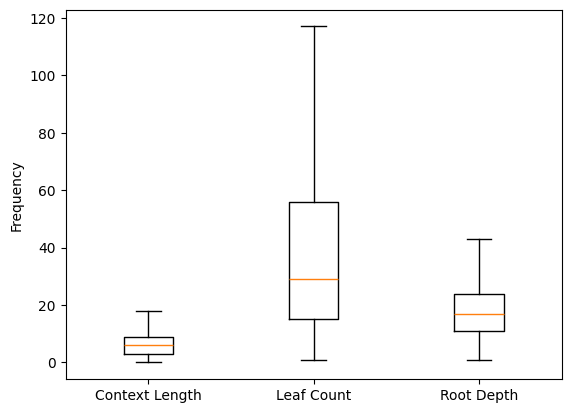

In [5]:

plt.boxplot(df[["context_len_type", "leaf_count_type", "root_depth_type"]].values, showfliers=False) 
plt.xticks([1, 2, 3], ["Context Length", "Leaf Count", "Root Depth"])
plt.ylabel("Frequency")
plt.ylabel("Frequency")
plt.show()
plt.show()

In [23]:
# sort the data by the total number of constructors used in the declaration
df['total_type_constructors'] = df[type_constructors_columns].sum(axis=1)
df = df.sort_values(by='total_type_constructors')

# get the declarations where decl_class is either 'Theorem' or 'Definition'
are_theorems_or_definitions = df['decl_class'].isin(['Theorem', 'Definition'])

the_or_def = df[are_theorems_or_definitions]
print(the_or_def[['file_name', 'total_type_constructors']].head(50000))

# print the top 100 declarations with the least number of constructors that are either theorems or definitions

#print(df[are_theorems_or_definitions].head(100))

                                         file_name  total_type_constructors
93634    Lean.Parser.Command.printAxioms.formatter                        1
3416                      IsAddQuantale.«term_⇨ᵣ_»                        1
261917                    Convolution.«term_⋆[_]_»                        1
352000                           Comon_Class.termΔ                        1
139638                 Lean.Elab.Term.elabBorrowed                        1
...                                            ...                      ...
336497                       DivisionRing.isDomain                       23
212002        Mathlib.Data.Real.EReal._auxLemma.10                       23
60672   Mathlib.Tactic.Monoidal.mkContext?.match_2                       23
417179    Lean.Meta.Grind.addEMatchTheorem.match_1                       23
373692                 Array.mergeUnsortedDedup.go                       23

[50000 rows x 2 columns]
